In [1]:
import sys
sys.path.append('../../')
sys.path.append('../../get_branch/linear')
sys.path.append('../../get_branch/cnn')
sys.path.append('../../get_branch/max_pooling')
sys.path.append('../../get_branch/interpolate')
sys.path.append('../../get_branch/adaptive_avg_pooling')
sys.path.append('../../model_json/make_json_program/cnn/test')

import json
import numpy as np
import matplotlib.pyplot as plt

import make_simple_interpolate_test
import linear_input_branch
import linear_hidden_branch
import linear_output_branch
import cnn_input_branch
import cnn_hidden_branch
import cnn_output_branch
import max_pooling_branch
import interpolate_branch
import adaptive_avg_pooling_branch

In [2]:
#画像は正方形を仮定
IMG_SIZE = 5

In [3]:
make_simple_interpolate_test.make_json()

In [4]:
json_file = open('../../model_json/json/simple_interpolate_test.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_channels': 3,
  'out_channels': 5,
  'kernel_size': 3,
  'layer_type': 'input',
  'processing_type': 'cnn',
  'skip_connection': 3},
 'layer1': {'input_channels': 5,
  'out_channels': 5,
  'scale_factor': 2,
  'layer_type': 'hidden',
  'processing_type': 'interpolate',
  'skip_connection': 0},
 'layer2': {'input_channels': 5,
  'out_channels': 7,
  'kernel_size': 2,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 1},
 'layer3': {'input_channels': 7,
  'out_channels': 7,
  'stride': 3,
  'layer_type': 'hidden',
  'processing_type': 'max_pooling',
  'skip_connection': 0},
 'layer4': {'input_features': 112,
  'out_features': 4,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer5': {'input_features': 4,
  'out_features': 2,
  'layer_type': 'output',
  'processing_type': 'linear'}}

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    #input層
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            print(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            print(len(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE)))
            print("##########################")

            
    #hidden層
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))
            print(linear_hidden_branch.get_branch(layer_json_value))
            print(len(linear_hidden_branch.get_branch(layer_json_value)))
            print("##########################")
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            print(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            print(len(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE)))
            print("##########################")

        elif layer_json_value["processing_type"] == "max_pooling":
            one_layer_branch_list, IMG_SIZE = max_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            print(one_layer_branch_list)
            print(len(one_layer_branch_list))
            print(IMG_SIZE)
            print("##########################")

        elif layer_json_value["processing_type"] == "interpolate":
            one_layer_branch_list, IMG_SIZE = interpolate_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            print(one_layer_branch_list)
            print(len(one_layer_branch_list))
            print(IMG_SIZE)
            print("##########################")

        elif layer_json_value["processing_type"] == "adaptive_avg_pooling":
            one_layer_branch_list, IMG_SIZE = adaptive_avg_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            print(one_layer_branch_list)
            print(len(one_layer_branch_list))
            print(IMG_SIZE)
            print("##########################")

    #output層      
    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
            print(linear_output_branch.get_branch(layer_json_value))
            print(len(linear_output_branch.get_branch(layer_json_value)))
            print("##########################")
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_output_branch.get_branch(layer_json_value,IMG_SIZE))
            
branch_list

[48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48]
75
##########################
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
125
10
##########################
[29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 

array([48., 48., 48., ...,  2.,  2.,  2.])

In [6]:
IMG_SIZE

4

(array([941.,   0.,   0.,   0.,   0., 500.,   0.,   0.,   0.,  75.]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ]),
 <a list of 10 Patch objects>)

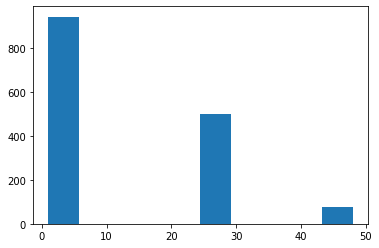

In [7]:
plt.hist(branch_list)